# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 
2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```
3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.


In [206]:
# Import libraries
import os
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=.8)
sns.set_style("white")

In [207]:
#load the data set
justice_equity_need_index = ("data/Justice_Equity_Need_Index.geojson")
justice_equity_need_index = gpd.read_file(justice_equity_need_index)

In [208]:
print(justice_equity_need_index)

     OBJECTID    zip jenicategory    jenipctl  jenirank riskcategory  \
0           1  91108       Lowest    0.000000       277       Lowest   
1           2  90631       Lowest    0.400000       276       Lowest   
2           3  90274       Lowest    0.700000       275       Lowest   
3           4  91361       Lowest    1.100000       274       Lowest   
4           5  90275       Lowest    1.400000       273       Lowest   
..        ...    ...          ...         ...       ...          ...   
276       277  90037      Highest   98.599998         5      Highest   
277       278  90061      Highest   98.900002         4      Highest   
278       279  90059      Highest   99.300003         3      Highest   
279       280  90014      Highest   99.599998         2      Highest   
280       281  90021      Highest  100.000000         1      Highest   

      riskpctl driverscategory  driverspctl systemcategory  systempctl  \
0     0.400000          Lowest     0.700000         Lowest   

In [209]:
#view columns
print(justice_equity_need_index.columns)

Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [210]:
#view first few rows
justice_equity_need_index.head(10)

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
5,6,90077,Lowest,1.8,272,Lowest,2.5,Lowest,13.6,Lowest,1.4,Bel-Air,District 3,SPA 5 - West,Los Angeles - Bel Air,0.268660,0.001831,"MULTIPOLYGON (((-118.45549 34.13449, -118.4555..."
6,7,91436,Lowest,2.2,271,Lowest,10.4,Lowest,5.4,Lowest,2.5,Encino,District 3,SPA 2 - San Fernando,Los Angeles - Encino,0.232985,0.001614,"MULTIPOLYGON (((-118.49296 34.18609, -118.4929..."
7,8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,District 2,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306,"MULTIPOLYGON (((-118.40129 33.98378, -118.4008..."
8,9,91007,Lowest,2.9,269,Lowest,3.2,Lowest,10.0,Lowest,6.9,Arcadia,District 5,SPA 3 - San Gabriel,City of Arcadia,0.212972,0.001380,"MULTIPOLYGON (((-118.05051 34.14841, -118.0500..."
9,10,90049,Lowest,3.3,268,Lowest,13.6,Lowest,2.5,Lowest,4.3,Brentwood,District 3,SPA 5 - West,Los Angeles - Brentwood,0.395030,0.003870,"MULTIPOLYGON (((-118.48933 34.13154, -118.4886..."


In [211]:
#dissolve by sup_dist
justice_equity_need = justice_equity_need_index[['sup_dist', 'geometry']]
sup_dist_dissolved = justice_equity_need.dissolve(by='sup_dist')

# View the resulting geodataframe
sup_dist_dissolved

,geometry
sup_dist,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833..."
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8..."
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0..."
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725..."
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1..."


In [212]:
sup_dist_dissolved.reset_index()

,sup_dist,geometry
0,District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833..."
1,District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8..."
2,District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0..."
3,District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725..."
4,District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1..."


/opt/tljh/user/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


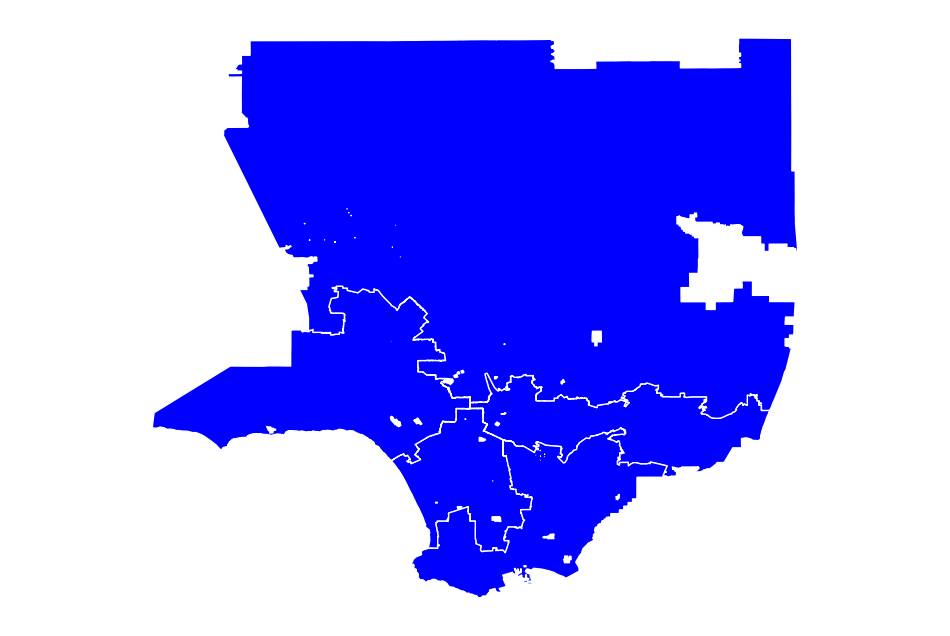

In [213]:
fig, ax = plt.subplots(figsize=(12, 8))
sup_dist_dissolved.reset_index().plot(color='blue',column='sup_dist',
                            ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show() 

In [214]:
#use an aggregate function to mind the mean of jenipctl

# Select the columns that you wish to retain in the data
justice_equity_need = justice_equity_need_index[['jenipctl', 'geometry']]

# Then summarize the quantative columns by 'sum'
jenipctl_mean = justice_equity_need.dissolve(aggfunc='mean')
jenipctl_mean

,geometry,jenipctl
0,"MULTIPOLYGON (((-118.59287 33.03451, -118.5928...",49.996085


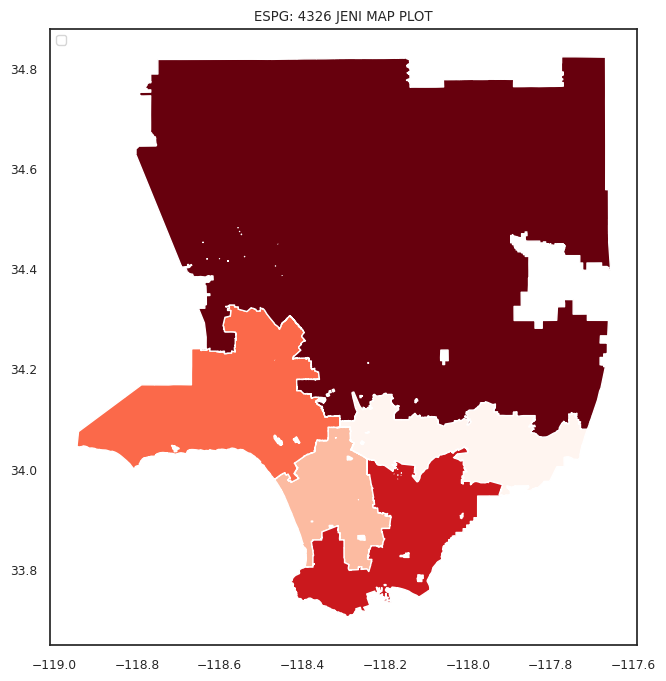

In [215]:
#Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean jenipctl

fix, ax = plt.subplots(figsize=(12,8))

#plot mean


#plot dissolved data frame
sup_dist_dissolved.reset_index().plot(cmap='Reds', column='sup_dist',
                                      ax=ax)


ax.set_title("ESPG: 4326 JENI MAP PLOT", fontzi);
plt.legend(['Jenypctl Mean', 'District Locations'],
           loc='upper left', 
           frameon = legend_drawn_flag)

plt.show()



In [149]:
#Write a meaningful caption of the map you have created. 
"This map shows the districts within the Justice Equity Need Index. Each district is designated by its own color. The mean, according to jenipctl, is showcased as well."


'This map shows the districts within the Justice Equity Need Index. Each district is designated by its own color. The mean, according to jenipctl, is showcased as well.'

### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 
3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.
4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 


In [150]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

#load the box module from shapely to create box objects
from shapely.geometry import box
import seaborn as sns

#ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

In [151]:
#load data
data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')
library_data = gpd.read_file('data/LB_City_Boundary.geojson')

In [152]:
print(data.crs)
print(library_data.crs)

epsg:4326
epsg:4326


In [153]:
library_data.head()

,OBJECTID,CITYNAME,CITYCODE,SHAPE_Length,SHAPE_Area,geometry
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18175 33.88555, -118.1817..."


In [154]:
#clip original data by city of Long beach boundary
data_clip = gpd.clip(data,library_data)

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [90]:
#Spatially join the data and your clipped dataset
data_joined = gpd.sjoin(data,library_data)

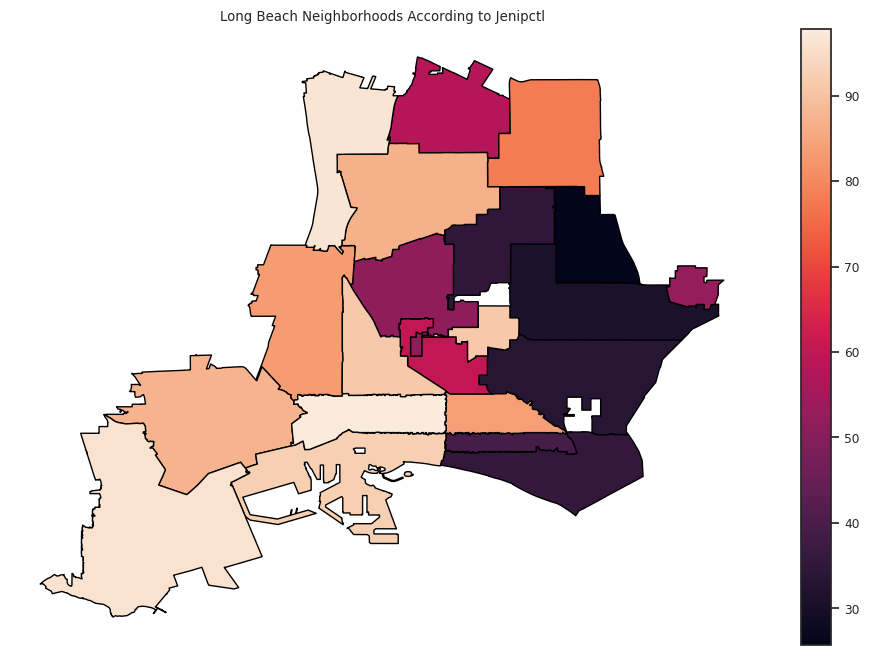

In [205]:
fig, ax = plt.subplots(figsize=(12,8))

data_joined.plot(column = "jenipctl",
                 edgecolor="black",
                 ax=ax, 
                 legend=True)

# Adjust legend location
ax.set_title("Long Beach Neighborhoods According to Jenipctl");
ax.set_axis_off()
plt.axis('equal')
plt.show()

### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 
2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.
3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
4. Using the following function, calculate the distance from the LMU campus to each zip code. 
5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

In [169]:
# Import necessary modules
from shapely.geometry import Point
import pycrs

In [167]:
#Load the Jeni dataset and select only zip and csa columns
data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')

jeni_dataset = data[["zip", "csa"]]

In [184]:
jeni_dataset = data.to_crs(epsg=3857)

In [172]:
lmulon = -188.4170
lmulat = 33.9710

In [176]:
LMU = gpd.GeoDataFrame([[Point(lmulon, lmulat)]], 
                       geometry='geometry', 
                       crs={'init': 'epsg:3857'}, 
                       columns=['geometry'])


/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [183]:
#Find the centroids of the zip code and city data frame.
jeni_dataset['centroid'] = jeni_dataset.centroid
print(jeni_dataset.head(5))

   OBJECTID    zip jenicategory  jenipctl  jenirank riskcategory  riskpctl  \
0         1  91108       Lowest       0.0       277       Lowest       0.4   
1         2  90631       Lowest       0.4       276       Lowest       2.9   
2         3  90274       Lowest       0.7       275       Lowest       3.6   
3         4  91361       Lowest       1.1       274       Lowest      12.2   
4         5  90275       Lowest       1.4       273       Lowest       6.8   

  driverscategory  driverspctl systemcategory  systempctl  \
0          Lowest          0.7         Lowest         3.3   
1          Lowest          1.8         Lowest         0.7   
2          Lowest          0.0         Lowest         7.2   
3          Lowest          0.4         Lowest         5.1   
4          Lowest          3.6         Lowest         6.2   

           neighborhood    sup_dist                   spa  \
0            San Marino  District 5   SPA 3 - San Gabriel   
1      La Habra Heights  District 4       

In [178]:
#Did you reseive a warning?
print("I didn't recieve a warning")

I didn't recieve a warning


In [180]:
# Using the following function, calculate the distance from LMU campus to each zipcode
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

geometry_jen = jeni_dataset.loc[0, 'geometry']

distance_jen = jeni_dataset.apply(calculate_distance, dest_geom = geometry_jen, src_col = 'centroid', target_col = 'Distance_To_LMU', axis=1)

print(distance_jen.head(10))

   OBJECTID    zip jenicategory  jenipctl  jenirank riskcategory  riskpctl  \
0         1  91108       Lowest       0.0       277       Lowest       0.4   
1         2  90631       Lowest       0.4       276       Lowest       2.9   
2         3  90274       Lowest       0.7       275       Lowest       3.6   
3         4  91361       Lowest       1.1       274       Lowest      12.2   
4         5  90275       Lowest       1.4       273       Lowest       6.8   
5         6  90077       Lowest       1.8       272       Lowest       2.5   
6         7  91436       Lowest       2.2       271       Lowest      10.4   
7         8  90094       Lowest       2.5       270       Lowest       9.0   
8         9  91007       Lowest       2.9       269       Lowest       3.2   
9        10  90049       Lowest       3.3       268       Lowest      13.6   

  driverscategory  driverspctl systemcategory  systempctl  \
0          Lowest          0.7         Lowest         3.3   
1          Lowest  

In [181]:
max_distance = distance_jen["Distance_To_LMU"].max()
mean_distance = distance_jen["Distance_To_LMU"].mean()

print("Maximum distance from LMU is %.0f km. The average distance from LMU is %.0f km" % (max_distance,mean_distance),)

Maximum distance from LMU is 129 km. The average distance from LMU is 32 km
